In [60]:
# import dependencies
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
database_path = "employee-sql-challenge.sql"


In [5]:
# create enginge and connect to db
#engine = create_engine(f'postgresql://localhost:5432/{database_path}')
#connection = engine.connect()

In [7]:
# import csv
salary = pd.read_csv('../data/salaries.csv')
salary.head()

titles = pd.read_csv('../data/titles.csv')
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


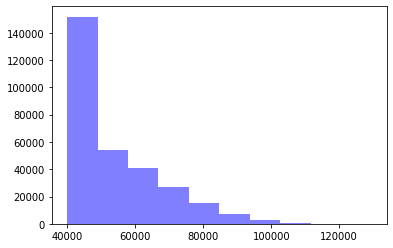

In [74]:
x = salary['salary']
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [78]:
# merge titles and salary df
titles_salary = pd.merge(salary, titles, on='emp_no', how='left')
titles_salary = titles_salary.drop_duplicates(subset = 'emp_no', keep='last')
titles_salary= titles_salary[['emp_no','salary','from_date_y','to_date_y','title']]
titles_salary


,emp_no,salary,from_date_y,to_date_y,title
0,10001,60117,1986-06-26,9999-01-01,Senior Engineer
1,10002,65828,1996-08-03,9999-01-01,Staff
2,10003,40006,1995-12-03,9999-01-01,Senior Engineer
4,10004,40054,1995-12-01,9999-01-01,Senior Engineer
6,10005,78228,1989-09-12,1996-09-12,Staff
...,...,...,...,...,...
443300,499995,40000,1997-06-02,9999-01-01,Engineer
443302,499996,58058,2002-05-13,9999-01-01,Senior Engineer
443304,499997,49597,1992-08-29,9999-01-01,Senior Engineer
443306,499998,40000,1993-12-27,1998-12-27,Staff


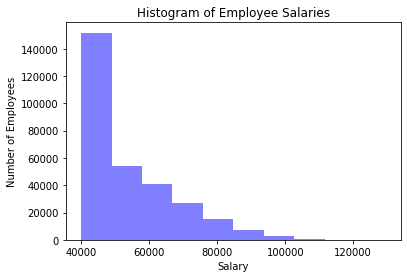

In [81]:
# histogram
x = titles_salary['salary']
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Histogram of Employee Salaries')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()


In [48]:
# for loop to get avg salary by title
title_list = ['Senior Engineer', 'Staff', 'Assistant Engineer', 'Engineer', 'Senior Staff',
 'Technique Leader']
mean_list = []
for each in title_list:
    titles_salary_sreng = titles_salary.loc[titles_salary['title']==each]
    mean_list.append(titles_salary_sreng['salary'].mean())
    

In [51]:
# create new df for titles and avg salaries
avg_salary_title = pd.DataFrame({'Title':title_list, 'Avg Salary':mean_list})
avg_salary_title

,Title,Avg Salary
0,Senior Engineer,48506.712843
1,Staff,58465.271904
2,Assistant Engineer,48564.434447
3,Engineer,48535.336511
4,Senior Staff,58549.098195
5,Technique Leader,48581.634360


Text(0, 0.5, 'Salary (USD)')

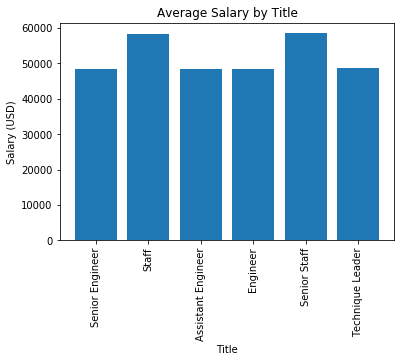

In [57]:
# barchart of avg salary by title
fig,ax = plt.subplots()
ax.bar(avg_salary_title['Title'],avg_salary_title['Avg Salary'])
plt.xticks(rotation=90)
plt.title('Average Salary by Title')
plt.xlabel('Title')
plt.ylabel('Salary (USD)')
#plt.show()